# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']
male_height_mean = male_df.Height.mean()
male_height_sd = male_df.Height.std()
male_weight_mean = male_df.Weight.mean()
male_weight_sd = male_df.Weight.std()
female_height_mean = female_df.Height.mean()
female_height_sd = female_df.Height.std()
female_weight_mean = female_df.Weight.mean()
female_weight_sd = female_df.Weight.std()
print('Male stats')
print('Male Height mean: {}'.format(male_height_mean))
print('Male Height std: {}'.format(male_height_sd))
print('Male Weight mean: {}'.format(male_weight_mean))
print('Male Weight std: {}'.format(male_weight_sd))
print('Female stats')
print('Female Height mean: {}'.format(female_height_mean))
print('Female Height std: {}'.format(female_height_sd))
print('Female Weight mean: {}'.format(female_weight_mean))
print('Female Weight std: {}'.format(female_weight_sd))
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male stats
Male Height mean: 69.02634590621741
Male Height std: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight std: 19.7811545167638
Female stats
Female Height mean: 63.70877360342507
Female Height std: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight std: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

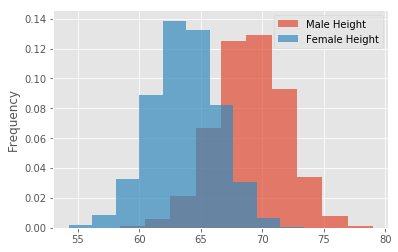

/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


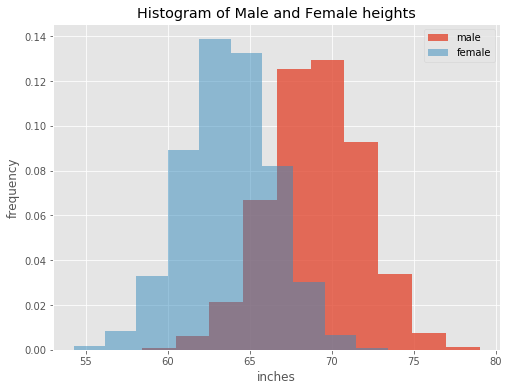

In [52]:
fig = plt.figure(figsize=[8,6])
plt.hist(male_df['Height'], alpha=.8, label='male', normed=True)
plt.hist(female_df['Height'], alpha=.5, label='female', normed=True)
plt.xlabel('inches')
plt.ylabel('frequency')
plt.title('Histogram of Male and Female heights')
plt.legend()
plt.show()

### Record your observations - are these inline with your personal observations?
Women tend to be shorter than men, however there is a fair amount of overlap of the tails. the bottom tail for men and upper tail for women. With some men being shorter than most women.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

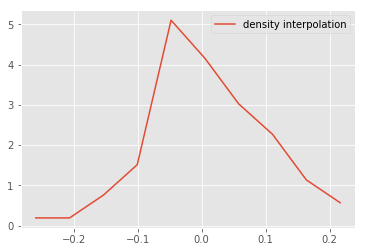

In [54]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = []
    pdfy = []
        # Interpolate through histogram bins 
        # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(len(n)):
        pdfx.append((bins[k]+bins[k+1]) / 2)
        pdfy.append(n[k])
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'density interpolation')
plt.legend()

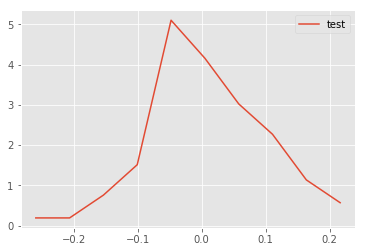

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

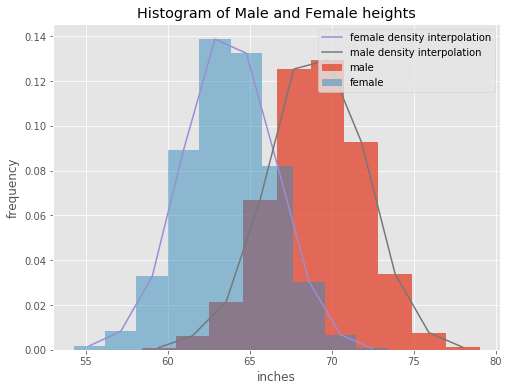

In [56]:
# You code here 
fig = plt.figure(figsize=[8,6])
plt.hist(male_df['Height'], alpha=.8, label='male', density=True)
plt.hist(female_df['Height'], alpha=.5, label='female', density=True)
x_f, y_f = density(female_df['Height'])
x_m, y_m = density(male_df['Height'])
plt.plot(x_f,y_f, label = 'female density interpolation')
plt.plot(x_m, y_m, label = 'male density interpolation')
plt.xlabel('inches')
plt.ylabel('frequency')
plt.title('Histogram of Male and Female heights')
plt.legend()
plt.show()

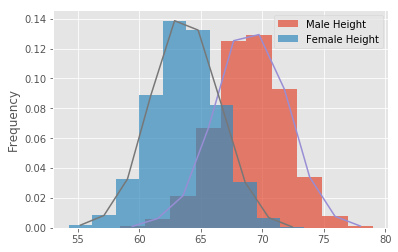

#### Repeat above exerice for male and female weights

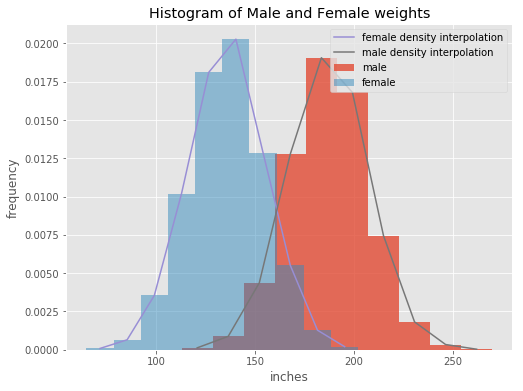

In [57]:
# Your code here 
fig = plt.figure(figsize=[8,6])
plt.hist(male_df['Weight'], alpha=.8, label='male', density=True)
plt.hist(female_df['Weight'], alpha=.5, label='female', density=True)
x_f, y_f = density(female_df['Weight'])
x_m, y_m = density(male_df['Weight'])
plt.plot(x_f,y_f, label = 'female density interpolation')
plt.plot(x_m, y_m, label = 'male density interpolation')
plt.xlabel('inches')
plt.ylabel('frequency')
plt.title('Histogram of Male and Female weights')
plt.legend()
plt.show()

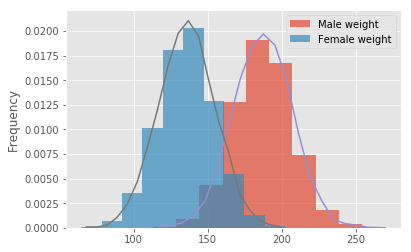

#### Write your observations in the cell below.

#### Record your observations - are these inline with your personal observations?
There is some overlap with weight in males/females than with heights. It's hard to know how this aligns with personal observations since many people do not like to share their weight. Perhaps men do weigh more since they have more muscle often. 


### So whats the takeaway when comparing male and female heights and weights 
Heights we can see visually, weight is harder to know. While there is overlap in weight, it is less so than in heights.


#### Repeat Above experiments in seaborn and compare with your results. 

In [63]:
import seaborn as sns
import scipy.stats as stats

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


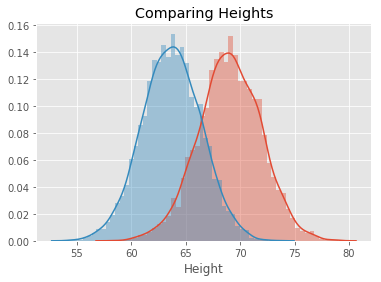

In [73]:
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

Text(0.5,1,'Comparing weights')

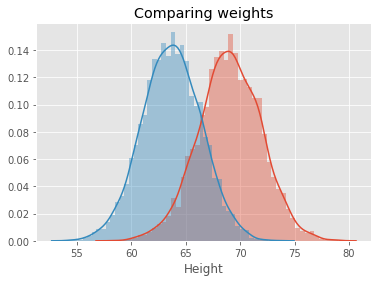

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


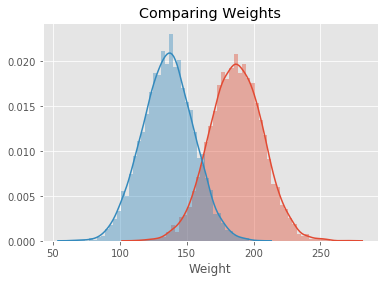

In [75]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

### Your comments on the two approaches here. 
A lot easier

### are they similar ? what makes them different if they are ?
Seaborn has info over which type density curve is plotted - though options do give you a lot of control. Whereas the other is explicit how density curve is calculated.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.